<a href="https://colab.research.google.com/github/Hamzaelalem/El-marsa-V2/blob/master/ProjetIntegrer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/hasibur013/diabetes-dataset/data')



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hamzaelalem
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hasibur013/diabetes-dataset


100%|██████████| 8.93k/8.93k [00:00<00:00, 5.42MB/s]

In [5]:
import pandas as pd
data = pd.read_csv('/content/diabetes-dataset/diabetes_dataset.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#inspect data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### data preprocecing

In [12]:
#handling missing data
# Assuming your dataset is loaded into a variable named 'data'
import numpy as np

# Replace zeros with NaN for specific columns
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)


In [13]:
# Filling missing values for each column with the median of that column
data['Glucose'].fillna(data['Glucose'].median(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)


<ipython-input-13-f17ca4db402e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].fillna(data['Glucose'].median(), inplace=True)
<ipython-input-13-f17ca4db402e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Step 3: Feature Scaling and Normalization

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the columns to be scaled
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Fit the scaler on the selected columns and transform the data
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the first few rows to check the scaled values
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


Step 4: Check for Class Imbalance in the Outcome Variable


Outcome
0    500
1    268
Name: count, dtype: int64


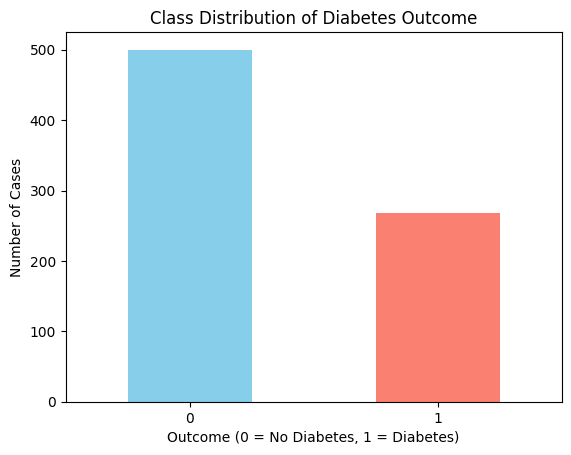

In [15]:
# Check for class distribution in the Outcome variable
class_distribution = data['Outcome'].value_counts()
print(class_distribution)

# Visualize the class distribution using a bar plot
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()


### Exploratory Data Analysis (EDA)

In [16]:
# Summary statistics for numerical features
print(data.describe())

        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17  4.625929e-18   5.782412e-18  -1.526557e-16  1.503427e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.552931e+00  -4.002619e+00  -2.516429e+00 -1.467353e+00   
25%   -8.448851e-01 -7.201630e-01  -6.937615e-01  -4.675972e-01 -2.220849e-01   
50%   -2.509521e-01 -1.530732e-01  -3.198993e-02  -1.230129e-02 -1.815412e-01   
75%    6.399473e-01  6.112653e-01   6.297816e-01   3.291706e-01 -1.554775e-01   
max    3.906578e+00  2.542658e+00   4.104082e+00   7.955377e+00  8.170442e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  768.000000  
mean   2.613650e-16              2.451743e-16  1.931325e-16    0.348958  
std    1.000652e+00              1.000652e+00  1

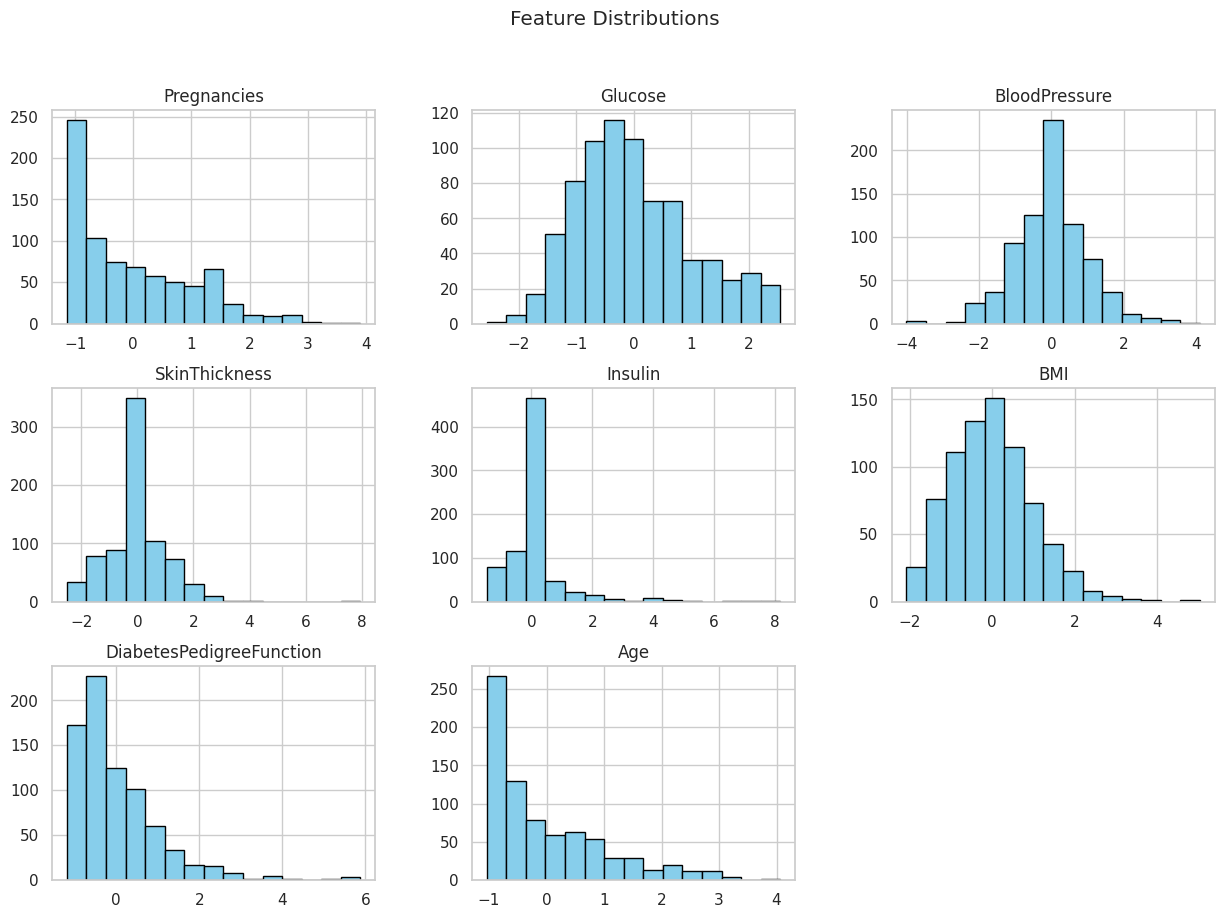

In [17]:
#Visualizing Feature Distributions
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Plotting histograms for each feature
data[columns_to_scale].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


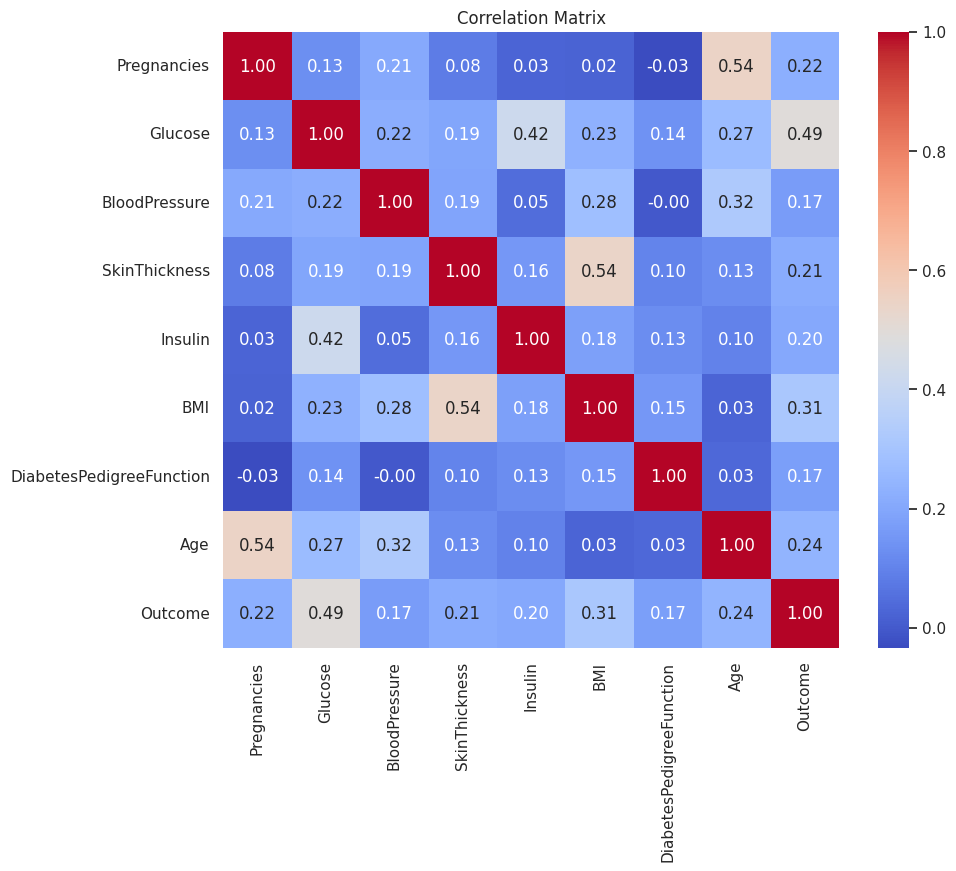

In [18]:
#Correlation Analysis
# Correlation matrix
correlation_matrix = data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-19-ad4820fd887a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='pastel')


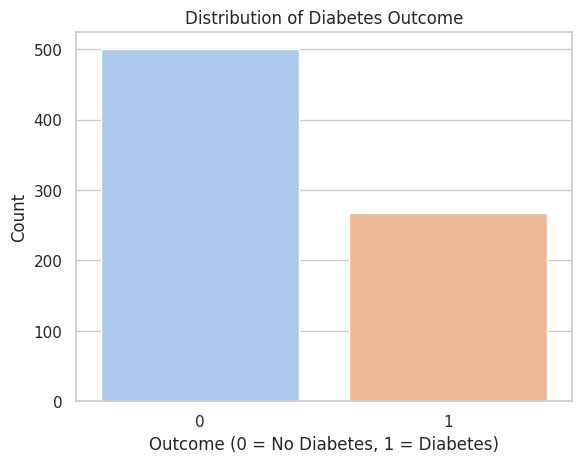

In [19]:
#Class Distribution Visualization

# Countplot for the Outcome variable
sns.countplot(x='Outcome', data=data, palette='pastel')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


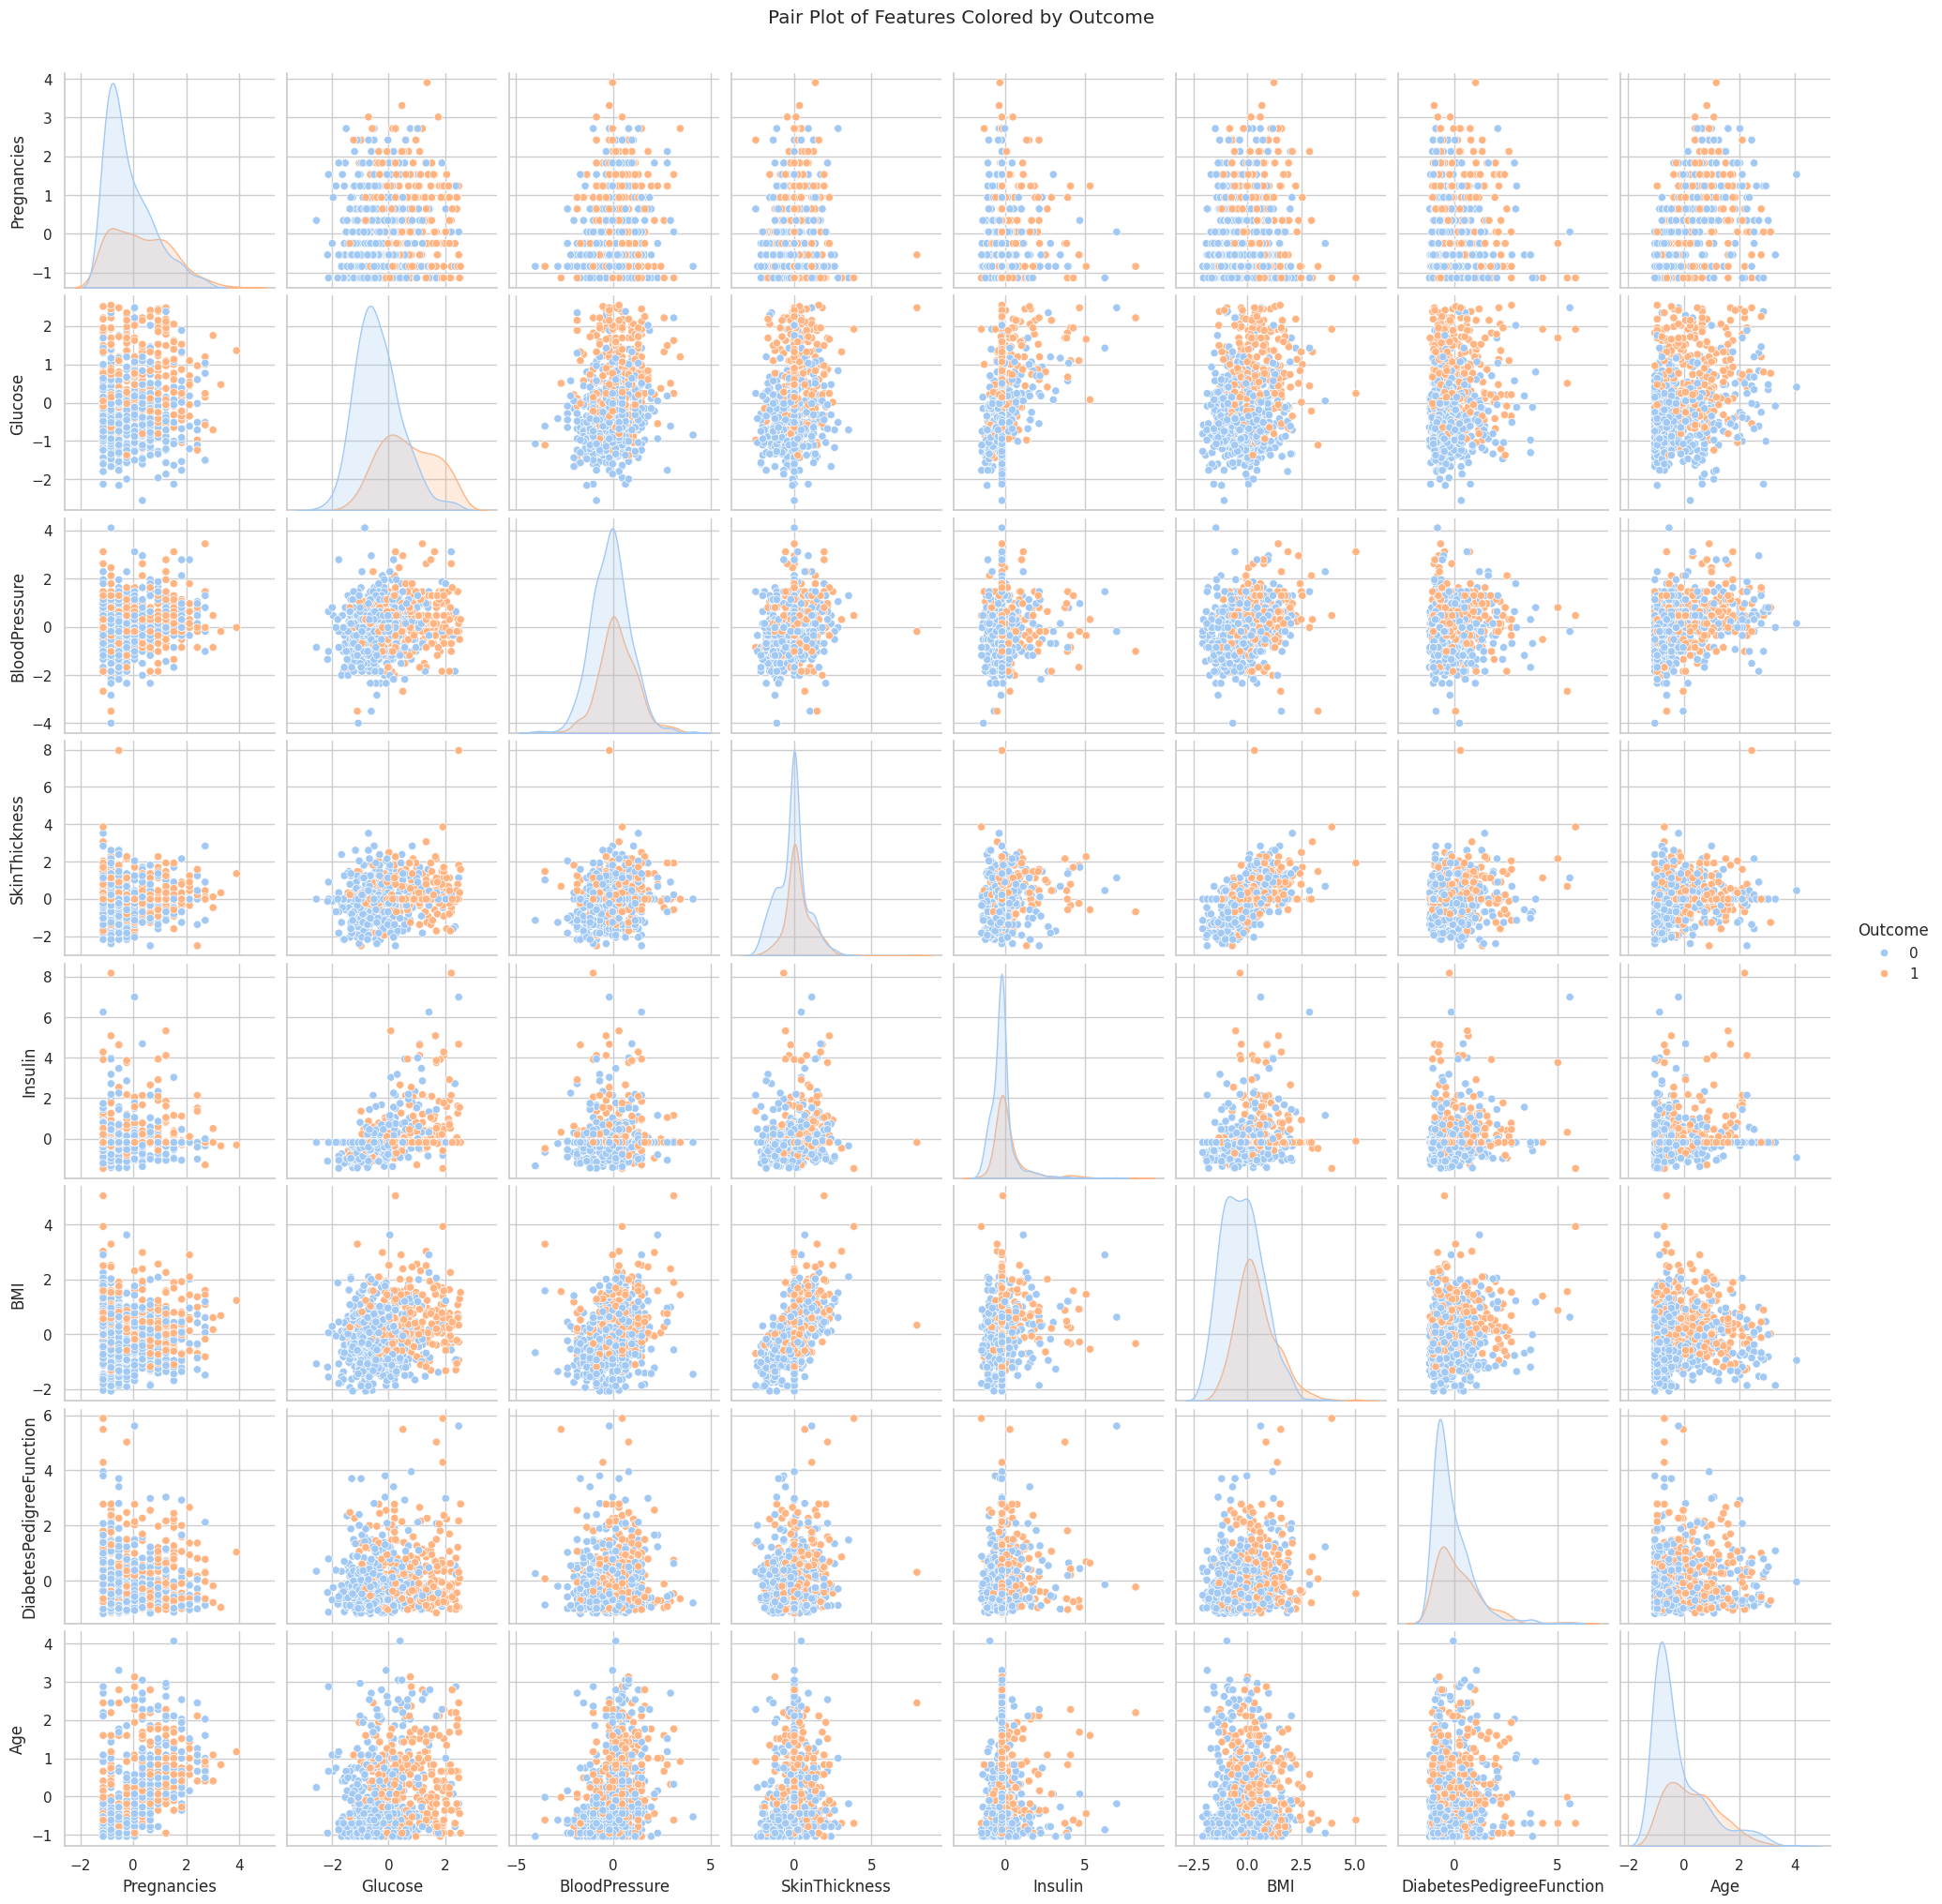

In [20]:
## Box Plots for Feature Analysis
#Use box plots to analyze how features
#differ between the two classes (diabetic and non-diabetic):
## Pair plot
sns.pairplot(data, hue='Outcome', vars=columns_to_scale, palette='pastel')
plt.suptitle('Pair Plot of Features Colored by Outcome', y=1.02)
plt.show()


### Step 3: Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
# Define features (X) and target (y)
X = data.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = data['Outcome']                 # Outcome variable


In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (537, 8), (537,)
Test set shape: (231, 8), (231,)


### Step 4: Model Selection and Training

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [25]:
# Initialize the model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(X_test)


Step 3: Evaluate Baseline Model
Use classification metrics to evaluate the model’s performance:

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, logistic_predictions))
print("\nClassification Report:")
print(classification_report(y_test, logistic_predictions))
print("Accuracy:", accuracy_score(y_test, logistic_predictions))


Confusion Matrix:
[[129  21]
 [ 38  43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231

Accuracy: 0.7445887445887446


NameError: name 'forest_model' is not defined